## Regression Problem
The project uses auto-mpg dataset from UCI Machine Learning Repository

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yellowbrick

In [68]:
def plot_learning_curve(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    t_error, v_error = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_t_pred= model.predict(X_train[:m])
        y_v_pred= model.predict(X_test)
        t_error.append(MSE(y_train[:m], y_t_pred))
        v_error.append(MSE(y_test, y_v_pred))
    plt.plot(np.sqrt(t_error), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(v_error), "b-", linewidth=2, label="validation")

In [4]:
df=pd.read_csv("auto-mpg.csv")

In [6]:
df.head(5)

,Unnamed: 0,mpg,displ,hp,weight,accel,origin,size
0,0,18.0,250.0,88,3139,14.5,US,15.0
1,1,9.0,304.0,193,4732,18.5,US,20.0
2,2,36.1,91.0,60,1800,16.4,Asia,10.0
3,3,18.5,250.0,98,3525,19.0,US,15.0
4,4,34.3,97.0,78,2188,15.8,Europe,10.0


In [7]:
df.tail(17)

,Unnamed: 0,mpg,displ,hp,weight,accel,origin,size
375,375,16.0,258.0,110,3632,18.0,US,15.0
376,376,37.3,91.0,69,2130,14.7,Europe,10.0
377,377,26.0,79.0,67,1963,15.5,Europe,10.0
378,378,20.2,232.0,90,3265,18.2,US,15.0
379,379,13.0,318.0,150,3755,14.0,US,20.0
380,380,21.0,199.0,90,2648,15.0,US,15.0
381,381,25.0,90.0,71,2223,16.5,Europe,10.0
382,382,20.5,231.0,105,3425,16.9,US,15.0
383,383,37.7,89.0,62,2050,17.3,Asia,10.0
384,384,36.0,120.0,88,2160,14.5,Asia,10.0


In [12]:
y=df['mpg']

In [17]:
X= df.iloc[:,2:4]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Text(0.5, 1.0, 'Training data with 2 Features')

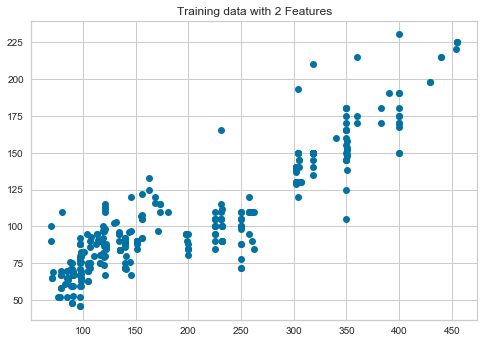

In [23]:
plt.plot(X_train.iloc[:,0], X_train.iloc[:,1], 'bo')
plt.title('Training data with 2 Features')

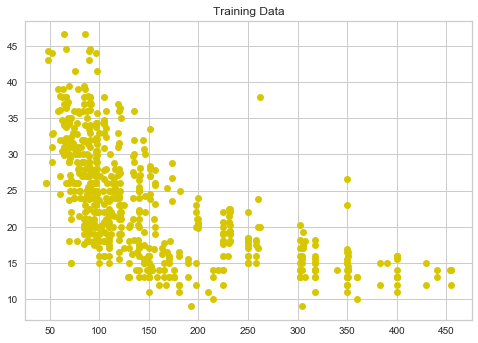

In [24]:
plt.plot(X_train, y_train, 'yo')
plt.title('Training Data')
plt.show()

### Polynomial regression model

In [25]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False)

In [26]:
X_poly=pf.fit_transform(X_train)

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lr.coef_ , lr.intercept_

(array([-1.17927740e-01, -1.82361457e-01, -3.53217821e-05,  8.92743430e-04,
        -5.26735065e-04]), 52.36460581143244)

In [34]:
y_pred= lr.predict(pf.transform(X_test))

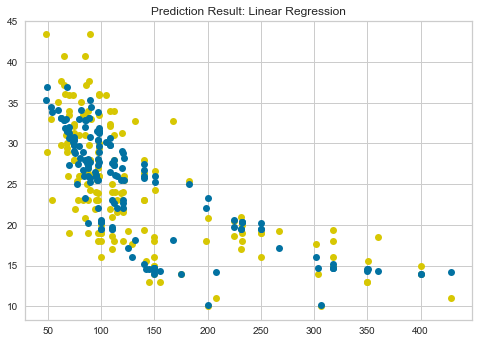

In [54]:
plt.plot(X_test, y_test, 'yo')
plt.plot(X_test, y_pred, "bo")
plt.title('Prediction Result: Linear Regression')
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error as MSE
mse = MSE(y_test, y_pred)
rmse = (mse)**(1/2)
print(rmse)

3.8972281835300424


#### Learning Curve
The polynomial regression models fits the  data well. It also has a relatively low RMSE

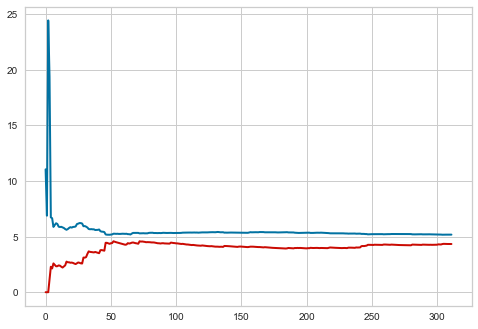

In [69]:
plot_learning_curve(lr, X, y)

## Decision Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
dr = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=1)

In [49]:
dr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.14,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [53]:
y_pred_dr = dr.predict(X_test)

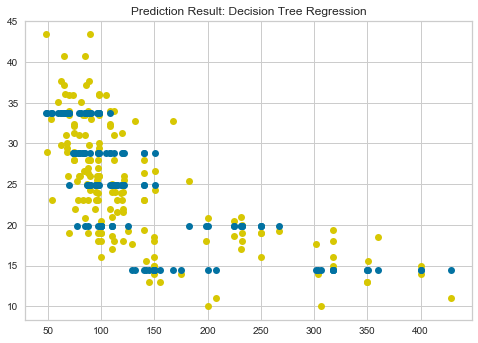

In [55]:
plt.plot(X_test, y_test, 'yo')
plt.plot(X_test, y_pred_dr, "bo")
plt.title('Prediction Result: Decision Tree Regression')
plt.show()

In [56]:
mse_dr = MSE(y_test, y_pred_dr)
rmse_dr = (mse_dr)**(1/2)
print(rmse_dr)

4.22591399490917


#### Learning Curve
The Decision tree value seems underfitted as shown by the learning curve below

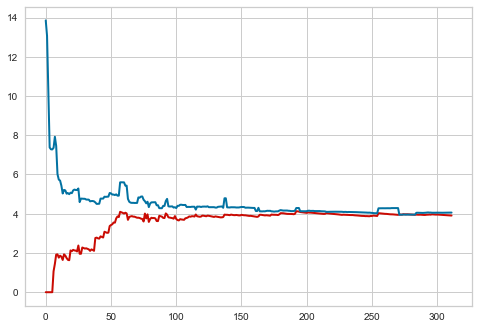

In [71]:
plot_learning_curve(dr, X, y)

## Random Forest 

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rf = RandomForestRegressor(n_estimators=200, max_depth=6, min_samples_leaf=0.16, oob_score=True, random_state=1)

In [59]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.16, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=True, random_state=1, verbose=0,
                      warm_start=False)

In [60]:
y_pred_rf = rf.predict(X_test)

In [63]:
rf.oob_score_

0.670492954093614

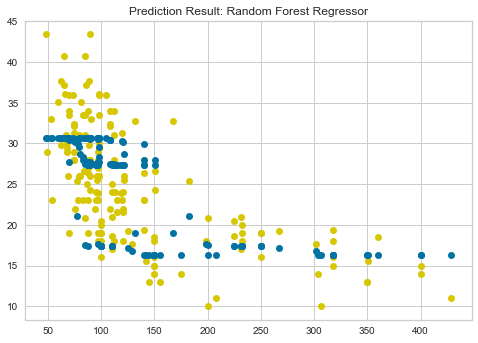

In [64]:
plt.plot(X_test, y_test, 'yo')
plt.plot(X_test, y_pred_rf, "bo")
plt.title('Prediction Result: Random Forest Regressor')
plt.show()

In [65]:
mse_rf = MSE(y_test, y_pred_rf)
rmse_rf = (mse_rf)**(1/2)
print(rmse_rf)

4.444584277666518


#### Learning Curve
The Random forest regressor overfits the data and consequently performs poorly with the testing data

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


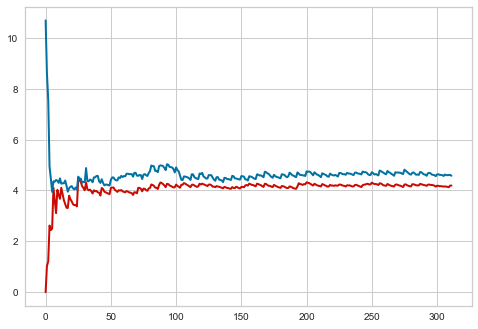

In [72]:
plot_learning_curve(rf, X, y)